In [7]:
#IMPORTING LIBRARIES
import cv2
import matplotlib.pyplot as plt
import numpy as np

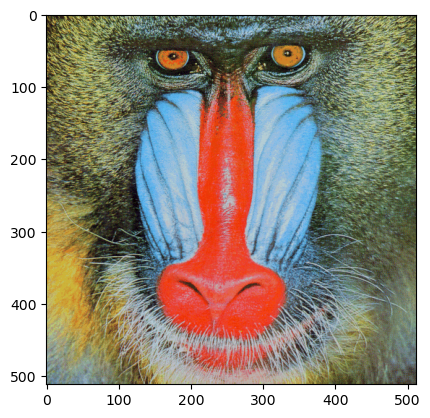

In [51]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Image using matplotlib
img = mpimg.imread(r"C:\Users\yashv\Desktop\sip images\standard_test_images\mandril_color.tif",0)
plt.imshow(img)

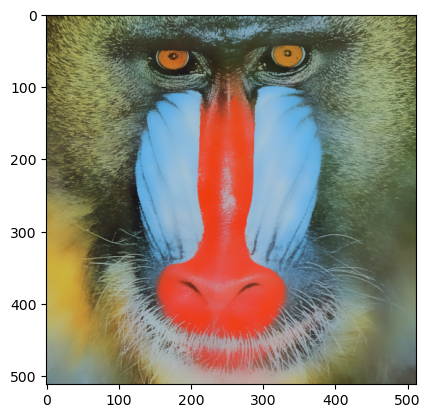

In [58]:
# Apply bilateral filter to preserve edges while smoothing the image
color = cv2.bilateralFilter(img, 100,100, 7)
plt.imshow(color)

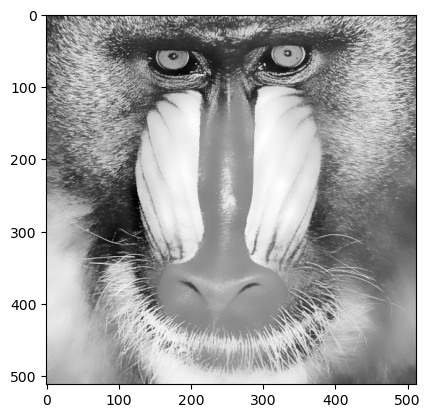

In [59]:
# Convert the image to grayscale
gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

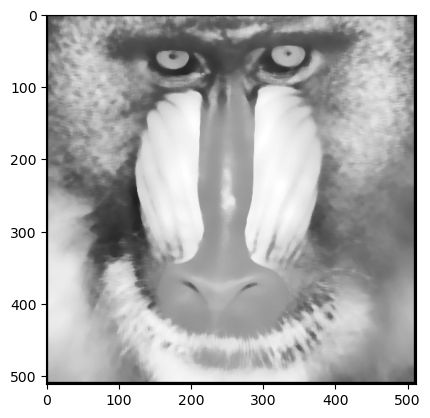

In [60]:
# Apply median blur to remove noise(salt&pepper) and smooth the image
blur = median_blur(gray, 7)
plt.imshow(blur,cmap='gray')
plt.show()

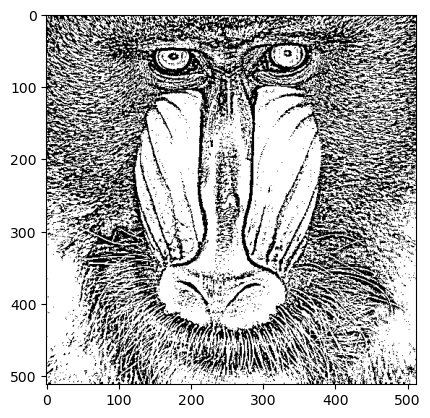

In [61]:
# Apply adaptive thresholding to the grayscale image
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

# Display the result
plt.imshow(edges, cmap='gray')  
plt.show()

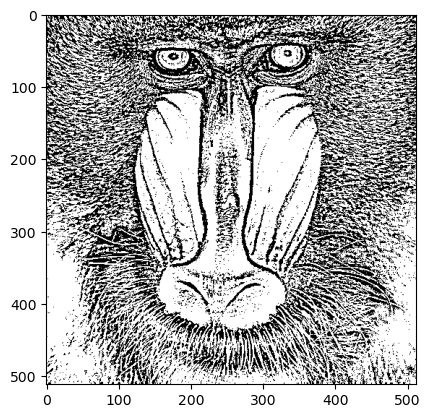

In [62]:
# Convert the thresholded image to color
frame_edge = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
plt.imshow(frame_edge)  
plt.show()

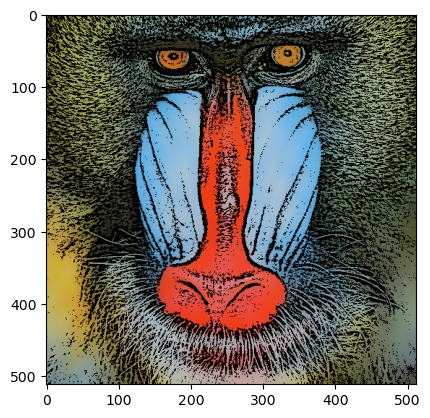

In [63]:
# Apply bitwise AND operation to the color image and the thresholded image
cartoon = cv2.bitwise_and(np.uint8(color), frame_edge)

# Display the resulting image
plt.imshow(cartoon)
plt.show()

appendix

In [38]:
def median_blur(img, ksize):    
    filtered_img = np.zeros(img.shape, dtype=np.float32)

    for i in range(ksize // 2, img.shape[0] - ksize // 2):
        for j in range(ksize // 2, img.shape[1] - ksize // 2):
            i_min = i - ksize // 2
            i_max = i + ksize // 2 + 1
            j_min = j - ksize // 2
            j_max = j + ksize // 2 + 1
            window = img[i_min:i_max, j_min:j_max]
            median = np.median(window)
            filtered_img[i, j] = median

    return filtered_img.astype(np.uint8)